In [11]:
from collections import defaultdict
from igraph import Graph as PlottableGraph, plot, layout, Plot

In [79]:
class Graph(object):
    def __init__(self):
        self.adj = defaultdict(lambda: [])
        
    def add_edge(self, a, b):
        self.adj[a].append(b)
        self.adj[b].append(a)
        
    def draw(self, root):
        graph = PlottableGraph()
        figure = Plot(bbox=(800, 600))
        for name in self.adj:
            graph.add_vertex(name=name, label=name)
        for name, neighbors in self.adj.items():
            for neighbor in neighbors:
                if name < neighbor:
                    graph.add_edge(name, neighbor, color="black")
        for vv in graph.vs:
            if vv.attributes()["name"] == root:
                root = vv.index
                break
                    
        figure.add(graph, layout=graph.layout("kk"), margin = 100,
                          vertex_label_dist=1, root=root)
        return figure

In [90]:
def bfs(graph, start):
    node_to_depth = {start: 0}
    parent = {start:None}
    
    next_level = [start]
    while len(next_level) > 0:
        print ("Level %d:" % (node_to_depth[next_level[0]],))
        current_level = next_level
        next_level = []
        for node in current_level:
            print "    ", node
            for neighbor in graph.adj[node]:
                if neighbor not in node_to_depth:
                    node_to_depth[neighbor] = node_to_depth[node] + 1
                    parent[neighbor] = node
                    next_level.append(neighbor)
    return node_to_depth, parent

In [80]:
g = Graph()
g.add_edge("START", "study_hard")
g.add_edge("study_hard", "mit")
g.add_edge("study_hard", "giveup")
g.add_edge("study_hard", "get_a_real_job")
g.add_edge("study_hard", "start_a_business")
g.add_edge("start_a_business", "marry")
g.add_edge("get_a_real_job", "marry")
g.add_edge("marry", "HAPPY")

g.add_edge("giveup", "lookforjob")
g.add_edge("lookforjob", "mcdonalds")
g.add_edge("mcdonalds", "low_income")

g.add_edge("mit", "grad_school")
g.add_edge("grad_school", "low_income")
g.add_edge("low_income", "unsatisfied_demands")
g.add_edge("unsatisfied_demands", "DEPRESSION")

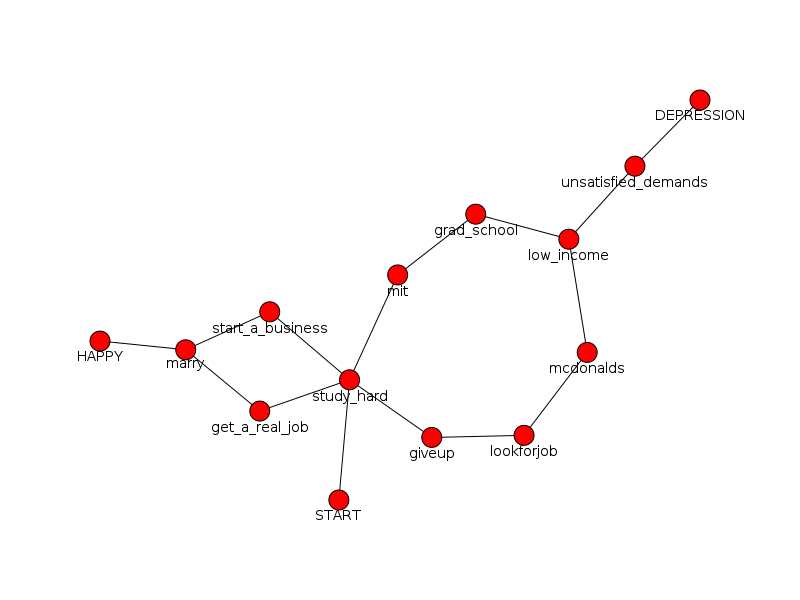

In [81]:
g.draw(root="START")

In [91]:
node_to_depth, parent = bfs(g, "START")

Level 0:
     START
Level 1:
     study_hard
Level 2:
     mit
     giveup
     get_a_real_job
     start_a_business
Level 3:
     grad_school
     lookforjob
     marry
Level 4:
     low_income
     mcdonalds
     HAPPY
Level 5:
     unsatisfied_demands
Level 6:
     DEPRESSION


In [94]:
def get_shortest_path(node, parent):
    result = []
    while node is not None:
        result.append(node)
        node = parent[node]
    return list(reversed(result))

In [95]:
get_shortest_path("DEPRESSION", parent)

['START',
 'study_hard',
 'mit',
 'grad_school',
 'low_income',
 'unsatisfied_demands',
 'DEPRESSION']